In [41]:
import pandas as pd
import os
from tqdm import tqdm
import geopandas as gpd
import matplotlib.pyplot as plt
import importlib
import numpy as np
import matplotlib

In [42]:
import ASTRA_plots_utils
import plotting_utils
import predictions_evaluations
import utils

In [4]:
fleet_size = 18000
path = f'/cluster/scratch/mfrancesc/IVT/SA_scenario/zurich/astra_5km_100pct/fleet_{fleet_size}'

In [6]:
last_iter = 60
methods = ['markov','msa02','mw5']

In [50]:
data_global = {}
for m in ['markov']:
    data_global[m] = ASTRA_plots_utils.read_output(
        os.path.join(path,"global"),
        last_iter=30
    )

100%|██████████| 31/31 [00:29<00:00,  1.04it/s]


In [19]:
data_fixed = ASTRA_plots_utils.read_output(
        os.path.join(path,"fixed"),
        last_iter=last_iter
    )

100%|██████████| 61/61 [01:03<00:00,  1.04s/it]


In [11]:
k_values = [10,25,50,100]

data_dynamic_CN = {}
for m in methods:
    data_dynamic_CN[m] = {}
    for k in k_values:
        if m != "markov" and k != 25:
            continue
        if m != "markov":
            data_dynamic_CN[m][k] = ASTRA_plots_utils.read_output(
                os.path.join(path,"dynamic_CN", m, "k"+str(k)),
                last_iter=last_iter
            )
        else:
            data_dynamic_CN[m][k] = ASTRA_plots_utils.read_output(
                os.path.join(path,"dynamic_CN", "k"+str(k)),
                last_iter=last_iter
            )

100%|██████████| 61/61 [01:24<00:00,  1.39s/it]


In [12]:
data_hex_500 = {}
for method in ['markov']:
    data_hex_500[method] = ASTRA_plots_utils.read_output(
        os.path.join(path,"hex","500"),
        last_iter=last_iter
    )

100%|██████████| 61/61 [01:23<00:00,  1.38s/it]


In [ ]:
# TODO: square

In [13]:
data_dynamic_FD = {}
for m in ['markov']:
    data_dynamic_FD[m] = {}
    for d in [500]:
        data_dynamic_FD[m][d] = ASTRA_plots_utils.read_output(
            os.path.join(path,"dynamic_FD", str(d)),
            last_iter=last_iter
        )

100%|██████████| 61/61 [01:23<00:00,  1.37s/it]


In [15]:
data_dynamic_PN = {}
for m in ['markov']:
    data_dynamic_PN[m] = {}
    for p in [0.1, 0.2, 0.3]:
        km = 1000
        data_dynamic_PN[m][p] = ASTRA_plots_utils.read_output(
            os.path.join(path,"dynamic_PN", f"p{p}_km{km}"),
            last_iter=last_iter
        )

100%|██████████| 61/61 [01:25<00:00,  1.40s/it]


In [51]:
data = {}
data['global'] = data_global
data['fixed'] = data_fixed
data['dynamic_CN'] = data_dynamic_CN
data['hex_500'] = data_hex_500
#data['square_850'] = data_square_850
data['dynamic_PN'] = data_dynamic_PN
data['dynamic_FD'] = data_dynamic_FD


In [45]:
import pickle

In [53]:
write=False
if write:
    # this is just to save it in case scratch is deleted
    with open(os.path.join(path, 'data_dict.pkl'), 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [54]:
read=False
if read:
    with open(os.path.join(path, 'data_dict.pkl'), 'rb') as handle:
        data = pickle.load(handle)

In [57]:
compare_methods = [
    ("Fixed feedback", data['fixed'], last_iter),
    ("Global feedback", data['global']['markov'], 30),
    #("Square 850m", data['square_850']['markov'], 45),
    ("Hex 500m", data['hex_500']['markov'], last_iter),
    ("KNN-CN 10", data['dynamic_CN']['markov'][10], last_iter),
    ("KNN-CN 25", data['dynamic_CN']['markov'][25], last_iter),
    ("KNN-CN 50", data['dynamic_CN']['markov'][50], last_iter),
    ("KNN-CN 100", data['dynamic_CN']['markov'][100], last_iter),
    ("KNN-PN 0.1, 1000", data['dynamic_PN']['markov'][0.1], last_iter),
    ("KNN-PN 0.2, 1000", data['dynamic_PN']['markov'][0.2], last_iter),
    ("KNN-PN 0.3, 1000", data['dynamic_PN']['markov'][0.3], last_iter),
    ("FD 500", data['dynamic_FD']['markov'][500], last_iter)
]

In [58]:
t = plotting_utils.get_multiple_stats_table(compare_methods, add_iter=True)
t

Fixed feedback (it.60)  \
Number of rides                                           408512   
Wait time (min)                   Mean                    3.2459   
                                  Median                       2   
                                  Std                    3.97552   
                                  75-perc                4.28333   
                                  99-perc                   18.3   
                                  Max                     123.55   
Travel time (min)                 Mean                   21.9083   
                                  Median                 16.0167   
                                  Std                    19.9735   
                                  75-perc                29.7167   
                                  99-perc                94.4333   
                                  Max                    231.183   
Mean direct distance (km)                                4.16427   
Average detour factor (time wise)                          1.523   
Total execution time                             9 days 22:28:13   

                                          Global feedback (it.30)  \
Number of rides                                            467119   
Wait time (min)                   Mean                    4.39727   
                                  Median                  2.23333   
                                  Std                     7.86658   
                                  75-perc                 5.13333   
                                  99-perc                    34.6   
                                  Max                     418.467   
Travel time (min)                 Mean                    27.2898   
                                  Median                    17.85   
                                  Std                       28.77   
                                  75-perc                 35.9667   
                                  99-perc                 140.997   
                                  Max                     418.767   
Mean direct distance (km)                                 4.02519   
Average detour factor (time wise)                         1.74418   
Total execution time                              3 days 14:35:04   

                                          Hex 500m (it.60) KNN-CN 10 (it.60)  \
Number of rides                                     589136            588040   
Wait time (min)                   Mean             3.21402           3.22599   
                                  Median               2.1           2.11667   
                                  Std              3.57655           3.65489   
                                  75-perc          4.26667              4.25   
                                  99-perc          16.7167           16.8167   
                                  Max              102.917           118.233   
Travel time (min)                 Mean             20.4471           20.5868   
                                  Median           14.8833           14.8833   
                                  Std              18.8697           19.0751   
                                  75-perc            27.75           27.9667   
                                  99-perc            87.65           89.6102   
                                  Max               267.45            254.95   
Mean direct distance (km)                          3.84155           3.82706   
Average detour factor (time wise)                  1.53104           1.54007   
Total execution time                       9 days 21:15:23   9 days 17:27:06   

                                          KNN-CN 25 (it.60) KNN-CN 50 (it.60)  \
Number of rides                                      589003            589285   
Wait time (min)                   Mean                3.241           3.24607   
                                  Median            2.11667           2.11667   
                          

In [59]:
compare_methods_smoothing = [
    ("KNN-CN 25 Markov", data['dynamic_CN']['markov'][25], last_iter-1),
    ("KNN-CN 25 Markov", data['dynamic_CN']['markov'][25], last_iter),
    ("KNN-CN 25 MSA=0.2", data['dynamic_CN']['msa02'][25], last_iter-1),
    ("KNN-CN 25 MSA=0.2", data['dynamic_CN']['msa02'][25], last_iter),
    ("KNN-CN 25 MW=5", data['dynamic_CN']['mw5'][25], last_iter-1),
    ("KNN-CN 25 MW=5", data['dynamic_CN']['mw5'][25], last_iter)
]

In [60]:
t = plotting_utils.get_multiple_stats_table(compare_methods_smoothing, add_iter=True)
t

KNN-CN 25 Markov (it.59)  \
Number of rides                                             586442   
Wait time (min)                   Mean                      3.2367   
                                  Median                   2.11667   
                                  Std                      3.67636   
                                  75-perc                  4.26667   
                                  99-perc                  16.9833   
                                  Max                      103.517   
Travel time (min)                 Mean                      20.651   
                                  Median                   14.9167   
                                  Std                      19.2944   
                                  75-perc                  27.9333   
                                  99-perc                  91.5265   
                                  Max                      247.267   
Mean direct distance (km)                                  3.83574   
Average detour factor (time wise)                          1.54034   
Total execution time                               9 days 18:44:26   

                                          KNN-CN 25 Markov (it.60)  \
Number of rides                                             589003   
Wait time (min)                   Mean                       3.241   
                                  Median                   2.11667   
                                  Std                      3.72413   
                                  75-perc                  4.26667   
                                  99-perc                  17.2333   
                                  Max                      158.983   
Travel time (min)                 Mean                     20.6911   
                                  Median                   14.9333   
                                  Std                      19.4366   
                                  75-perc                  27.9667   
                                  99-perc                  90.6497   
                                  Max                      260.583   
Mean direct distance (km)                                  3.83987   
Average detour factor (time wise)                          1.53674   
Total execution time                               9 days 18:44:26   

                                          KNN-CN 25 MSA=0.2 (it.59)  \
Number of rides                                              579283   
Wait time (min)                   Mean                      3.22827   
                                  Median                        2.1   
                                  Std                        3.6477   
                                  75-perc                      4.25   
                                  99-perc                   16.9333   
                                  Max                       103.267   
Travel time (min)                 Mean                      20.5425   
                                  Median                    14.8667   
                                  Std                       19.0633   
                                  75-perc                      27.9   
                                  99-perc                     88.25   
                                  Max                       251.383   
Mean direct distance (km)                                   3.81731   
Average detour factor (time wise)                             1.538   
Total execution time                                9 days 14:06:39   

                                          KNN-CN 25 MSA=0.2 (it.60)  \
Number of rides                                              581925   
Wait time (min)                   Mean                      3.20499   
                                  Median                        2.1   
                                  Std                       3.58716   
                                  75-perc                      4.25   
                          

,count,mean,std,min,25%,50%,75%,95%,99%,max,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,MSE,RMSE,MAE,% errors < 0 (overestimated)
Fixed feedback (it.60),21550,-6.709515,3.977777,-9.983333,-9.483333,-7.983333,-5.616667,0.316667,8.400333,78.750000,5.850000,8.033333,9.483333,9.483333,9.883333,2.826784,60.839569,7.799972,7.269722,94.547564
Global feedback (it.30),28985,-0.247375,7.594627,-4.443473,-3.943473,-2.343473,0.456527,9.153193,29.519860,197.606527,1.843473,3.210140,3.943473,9.153193,29.519860,6.526966,57.737563,7.598524,3.890537,72.427117
Hex 500m (it.60),31764,0.039653,3.459426,-13.727083,-1.996296,-0.735276,1.173753,6.447103,12.779771,41.813477,0.880175,1.775828,2.933677,6.814157,12.846420,2.516911,11.968826,3.459599,2.373602,61.654703
KNN-CN 10 (it.60),31662,0.106245,3.630612,-13.217693,-1.886654,-0.651272,1.225701,6.445037,13.211641,57.877370,0.835864,1.681667,2.956816,6.855765,13.226201,2.739665,13.192213,3.632109,2.384628,61.142695
KNN-CN 25 (it.60),31706,0.052988,3.699788,-14.137260,-1.973463,-0.794425,1.158060,6.339987,13.292490,123.226000,0.911849,1.759436,2.905725,6.621944,13.330941,2.824969,13.690807,3.700109,2.389635,62.600139
KNN-CN 50 (it.60),31587,0.014852,3.483631,-13.134803,-1.985679,-0.853077,1.110961,6.394404,12.699772,103.620883,0.933875,1.773603,2.820053,6.598997,12.705431,2.574516,12.135521,3.483608,2.346783,63.503973
KNN-CN 100 (it.60),31688,0.061590,3.771572,-13.713474,-1.998922,-0.874510,1.163071,6.389368,13.128244,107.335025,0.962842,1.818091,2.859561,6.611430,13.133289,2.904808,14.228096,3.772015,2.406280,63.131154
"KNN-PN 0.1, 1000 (it.60)",31527,0.037376,4.207767,-10.747012,-2.116325,-0.984469,1.077219,6.663125,13.898376,224.778744,1.019619,1.918310,2.941645,6.955008,13.898376,3.369553,17.706138,4.207866,2.520367,64.227488
"KNN-PN 0.2, 1000 (it.60)",31477,-0.021345,3.767041,-9.597213,-2.121868,-0.988829,1.075663,6.450879,13.317084,107.806714,1.012532,1.910149,2.913571,6.626778,13.317084,2.855433,14.190603,3.767042,2.457052,64.402580
"KNN-PN 0.3, 1000 (it.60)",31611,-0.049725,3.521415,-10.059169,-2.110260,-0.959736,1.063839,6.344344,12.754574,73.331500,0.992098,1.901520,2.897638,6.554603,12.754574,2.569526,12.402447,3.521711,2.408316,64.338363


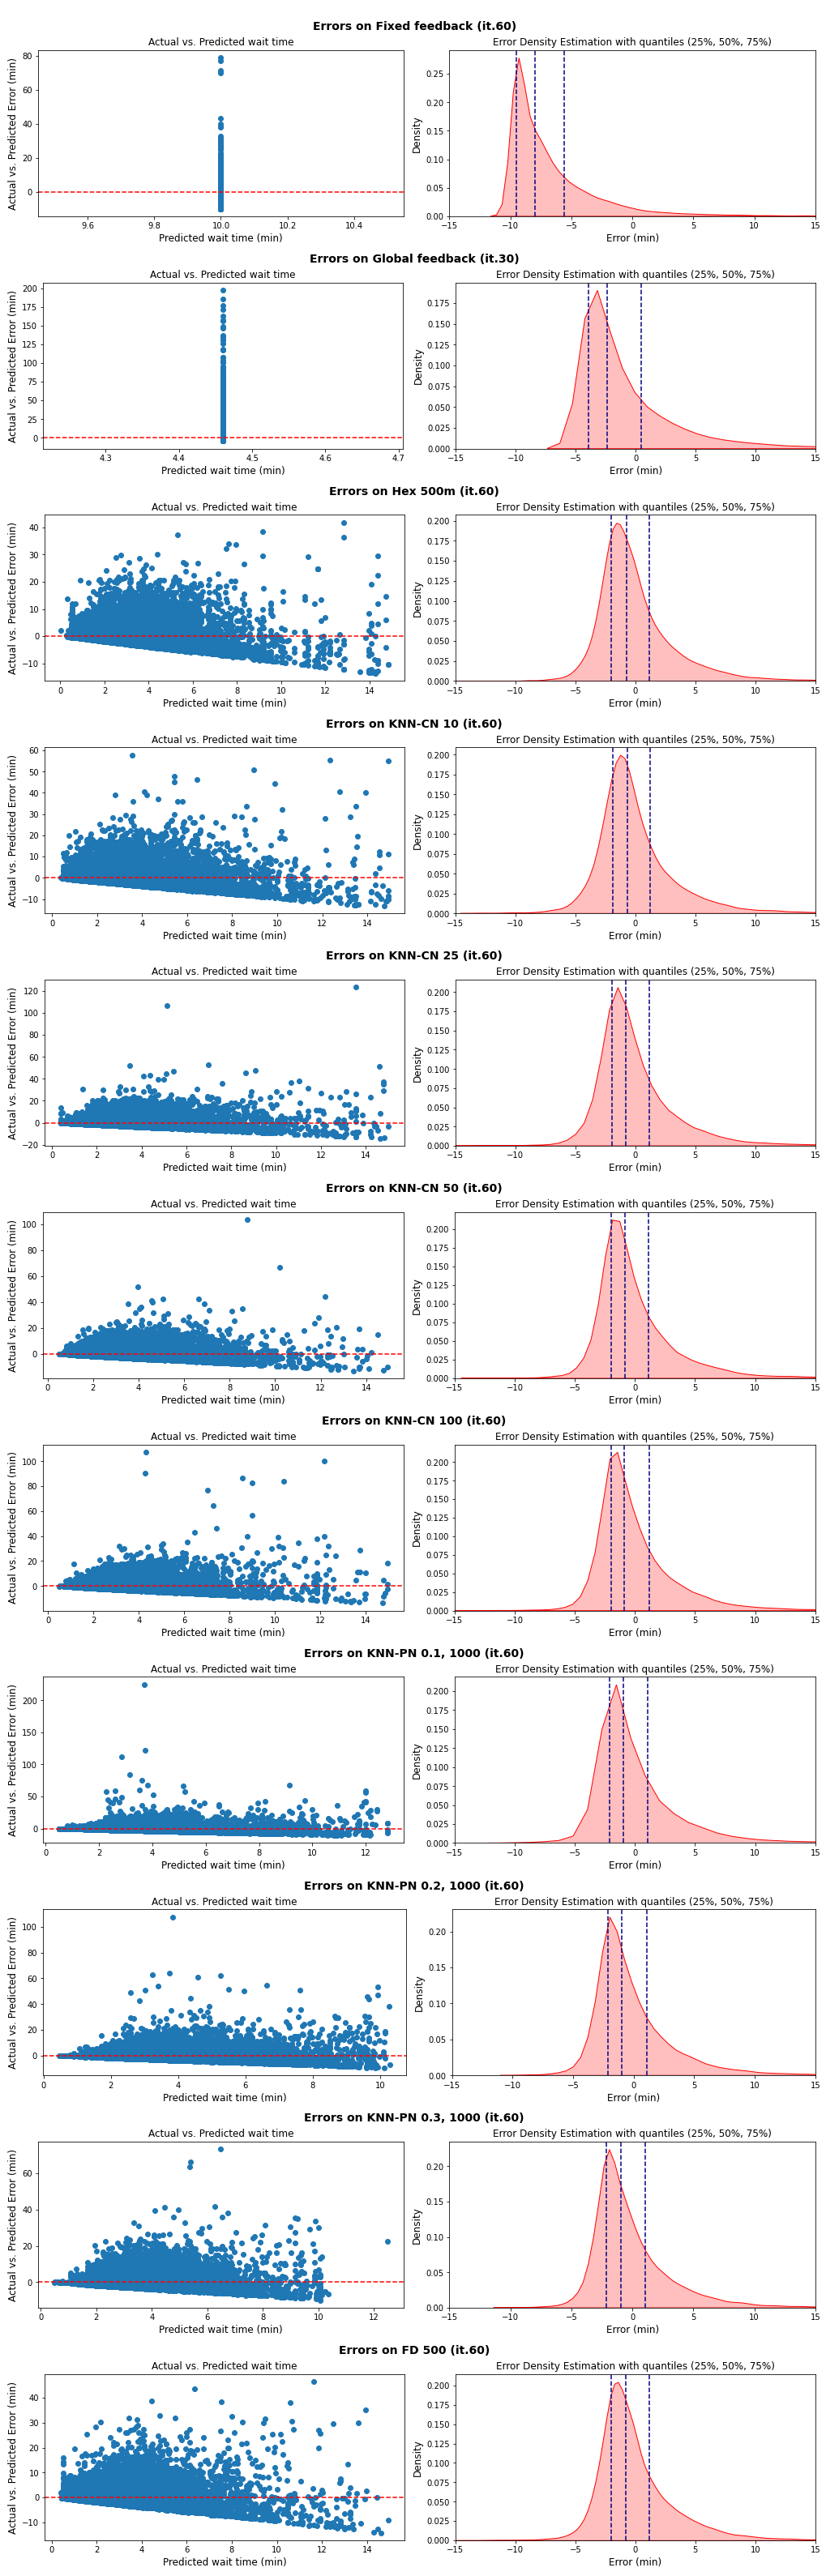

In [61]:
table_compare_methods = predictions_evaluations.plot_multiple_actual_vs_fitted(
    compare_methods, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True
)

In [62]:
t = table_compare_methods.copy(deep=True)
t = t.drop(columns=['min', '25%', '50%', '75%', '95%', '99%', 'max', 'MSE'])
t

,count,mean,std,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,RMSE,MAE,% errors < 0 (overestimated)
Fixed feedback (it.60),21550,-6.709515,3.977777,5.850000,8.033333,9.483333,9.483333,9.883333,2.826784,7.799972,7.269722,94.547564
Global feedback (it.30),28985,-0.247375,7.594627,1.843473,3.210140,3.943473,9.153193,29.519860,6.526966,7.598524,3.890537,72.427117
Hex 500m (it.60),31764,0.039653,3.459426,0.880175,1.775828,2.933677,6.814157,12.846420,2.516911,3.459599,2.373602,61.654703
KNN-CN 10 (it.60),31662,0.106245,3.630612,0.835864,1.681667,2.956816,6.855765,13.226201,2.739665,3.632109,2.384628,61.142695
KNN-CN 25 (it.60),31706,0.052988,3.699788,0.911849,1.759436,2.905725,6.621944,13.330941,2.824969,3.700109,2.389635,62.600139
KNN-CN 50 (it.60),31587,0.014852,3.483631,0.933875,1.773603,2.820053,6.598997,12.705431,2.574516,3.483608,2.346783,63.503973
KNN-CN 100 (it.60),31688,0.061590,3.771572,0.962842,1.818091,2.859561,6.611430,13.133289,2.904808,3.772015,2.406280,63.131154
"KNN-PN 0.1, 1000 (it.60)",31527,0.037376,4.207767,1.019619,1.918310,2.941645,6.955008,13.898376,3.369553,4.207866,2.520367,64.227488
"KNN-PN 0.2, 1000 (it.60)",31477,-0.021345,3.767041,1.012532,1.910149,2.913571,6.626778,13.317084,2.855433,3.767042,2.457052,64.402580
"KNN-PN 0.3, 1000 (it.60)",31611,-0.049725,3.521415,0.992098,1.901520,2.897638,6.554603,12.754574,2.569526,3.521711,2.408316,64.338363


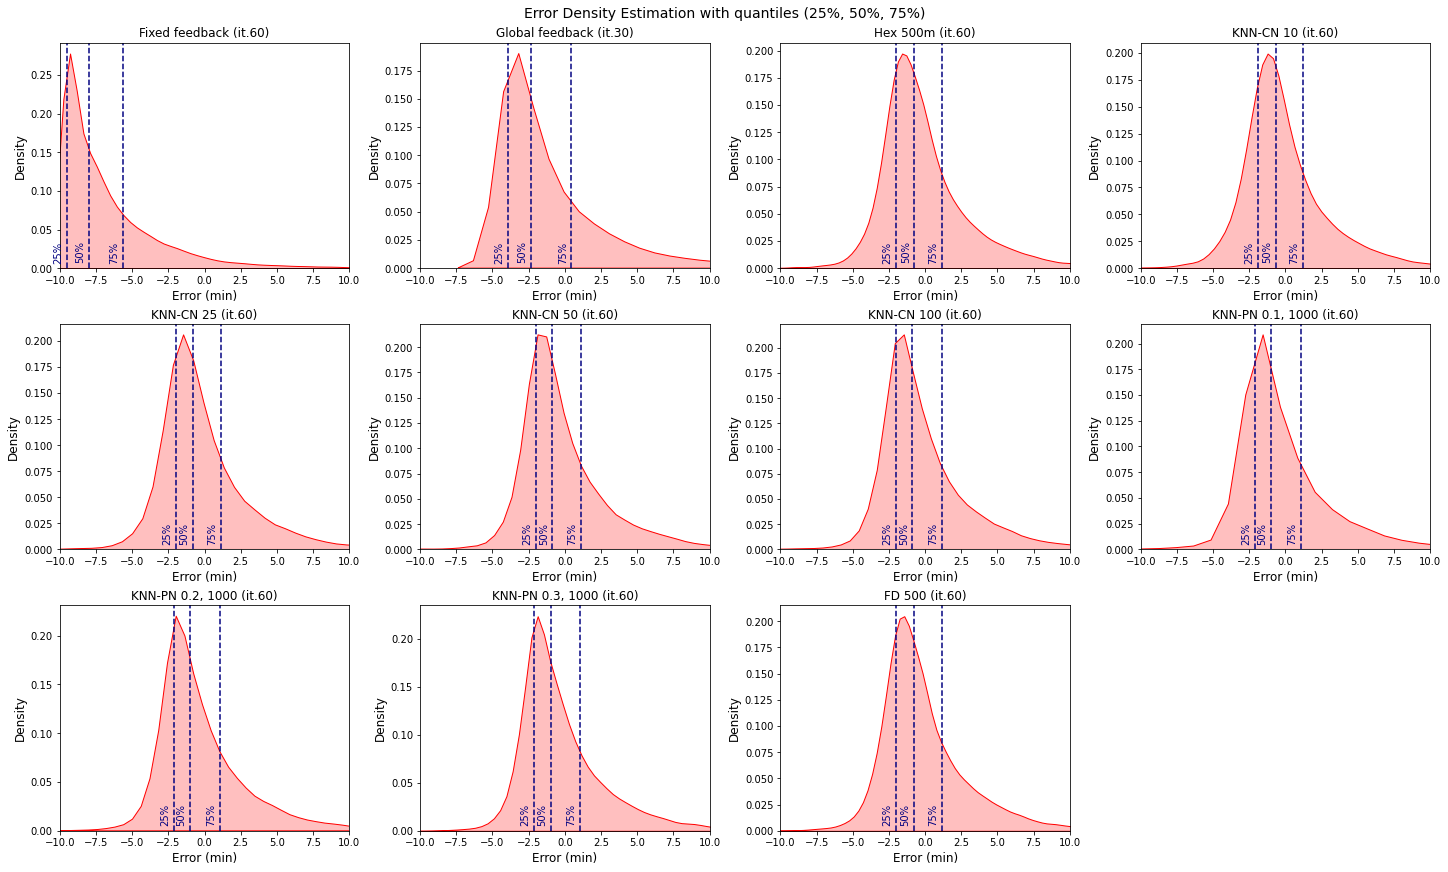

In [63]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(
    compare_methods, 'waitTime', 3,4, kde_plot_limit=10, add_iteration_to_title=True)

,count,mean,std,min,25%,50%,75%,95%,99%,max,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,MSE,RMSE,MAE,% errors < 0 (overestimated)
KNN-CN 25 Markov (it.59),31673,0.053503,3.606755,-12.219786,-1.978223,-0.778611,1.185113,6.485682,12.832834,68.971086,0.915561,1.778182,2.953679,6.797013,12.832834,2.691790,13.011134,3.607095,2.401124,62.463297
KNN-CN 25 Markov (it.60),31706,0.052988,3.699788,-14.137260,-1.973463,-0.794425,1.158060,6.339987,13.292490,123.226000,0.911849,1.759436,2.905725,6.621944,13.330941,2.824969,13.690807,3.700109,2.389635,62.600139
KNN-CN 25 MSA=0.2 (it.59),31488,0.008280,3.620275,-14.232126,-2.040404,-0.836816,1.128545,6.447923,13.227041,47.547442,0.922350,1.817541,2.953631,6.879911,13.347147,2.687535,13.106041,3.620227,2.425531,63.341590
KNN-CN 25 MSA=0.2 (it.60),31536,-0.030382,3.487692,-12.815926,-2.037036,-0.838863,1.103113,6.225885,12.418806,79.329696,0.926279,1.810014,2.926430,6.585371,12.433504,2.555612,12.164530,3.487769,2.373474,63.375190
KNN-CN 25 MW=5 (it.59),31603,0.090023,3.849014,-13.679300,-1.987727,-0.776679,1.172820,6.388746,13.296332,125.867874,0.904707,1.779365,2.918195,6.676241,13.342708,2.991886,14.822542,3.850005,2.423048,62.557352
KNN-CN 25 MW=5 (it.60),31558,-0.020228,3.389417,-13.807797,-1.990187,-0.816463,1.090409,6.171164,12.178522,44.156148,0.906239,1.767384,2.862299,6.494252,12.265943,2.464935,11.488195,3.389424,2.326433,63.473604


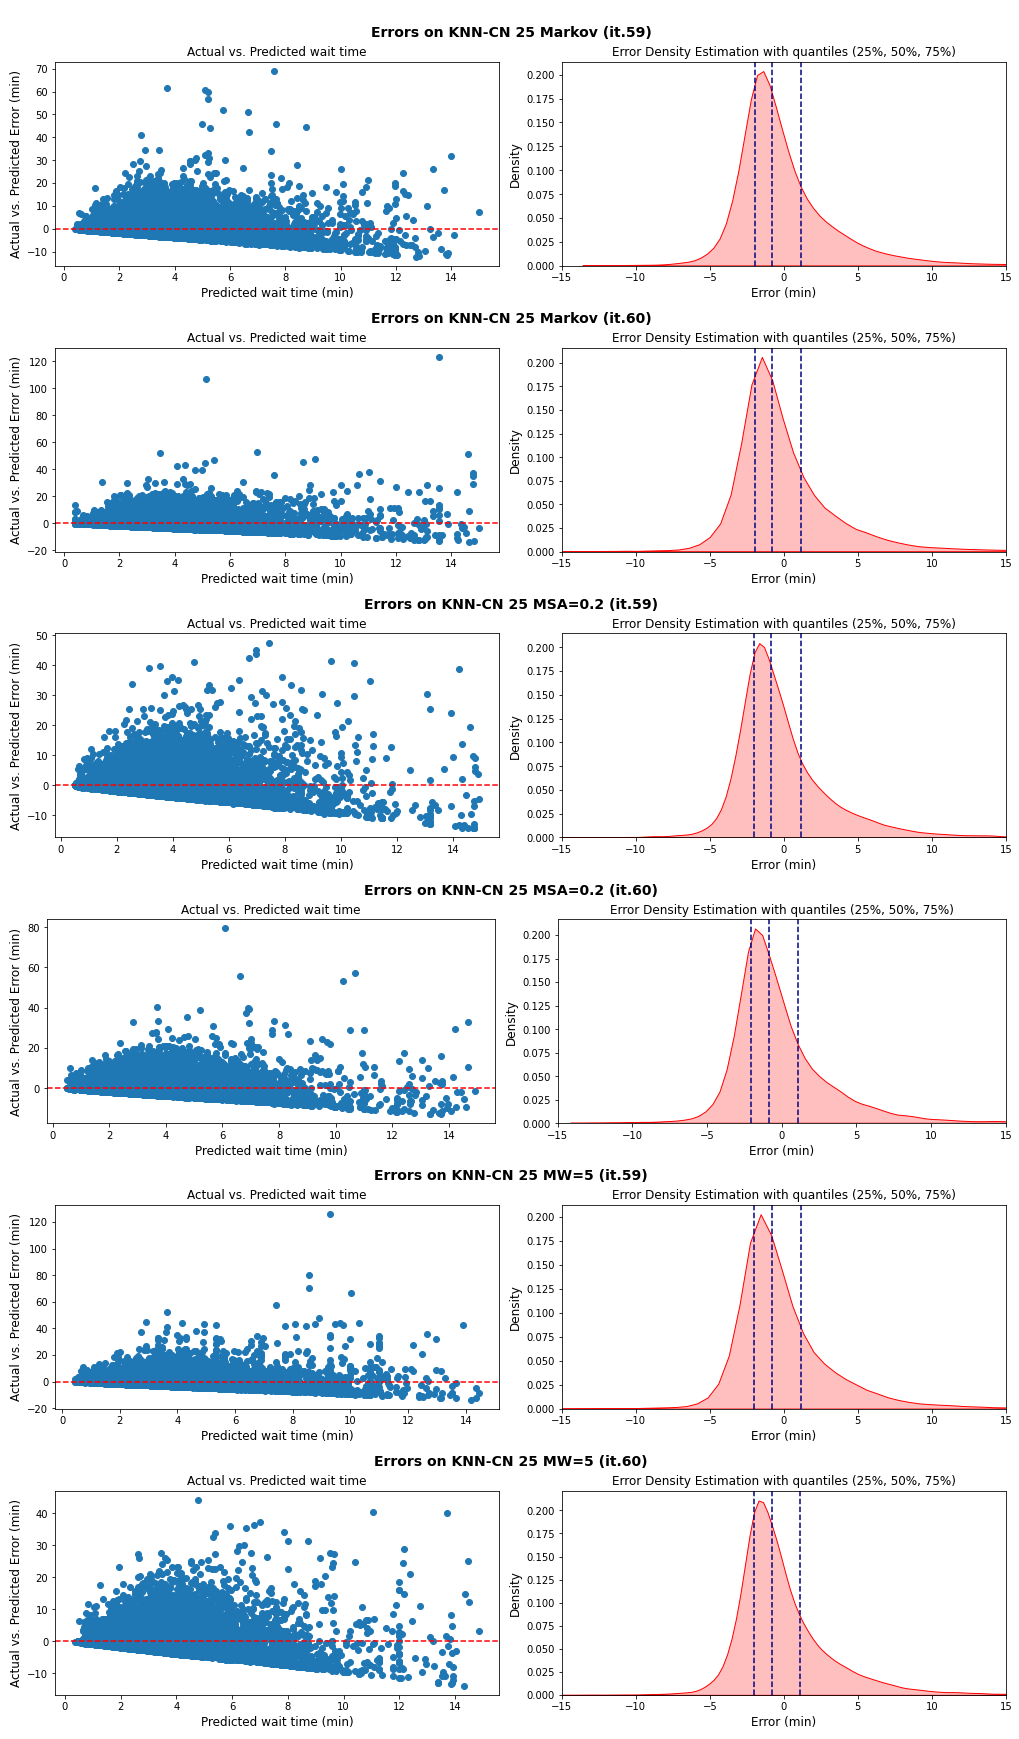

In [64]:
_ = predictions_evaluations.plot_multiple_actual_vs_fitted(
    compare_methods_smoothing, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True)

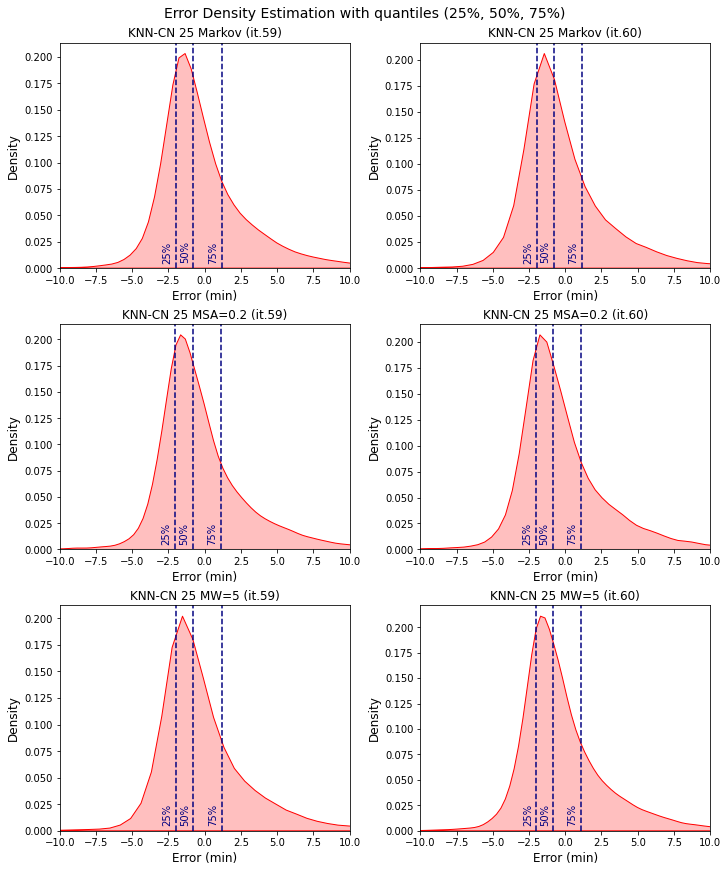

In [65]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(
    compare_methods_smoothing, 'waitTime', 3,2, kde_plot_limit=10, add_iteration_to_title=True)

In [66]:
t = predictions_evaluations.get_confidence_intervals_table(
    compare_methods, 'waitTime', add_iteration_to_title=True,
    confidence_intervals=[1,2,3,4,5,7.5,10])
t

,% trips with abs error < 1,% trips with abs error < 2,% trips with abs error < 3,% trips with abs error < 4,% trips with abs error < 5,% trips with abs error < 7.5,% trips with abs error < 10
Fixed feedback (it.60),2.821346,5.860789,9.531323,13.870070,19.271462,41.786543,99.294664
Global feedback (it.30),12.527169,27.641884,45.806452,86.631016,90.281180,93.531137,95.494221
Hex 500m (it.60),28.211182,55.811611,75.912983,85.669311,90.697015,96.042690,98.007178
KNN-CN 10 (it.60),29.931779,57.478997,75.579559,84.877771,90.253300,95.976249,97.921799
KNN-CN 25 (it.60),27.565760,56.503501,76.357787,86.097269,90.903930,96.174226,97.934145
KNN-CN 50 (it.60),26.862317,56.507424,77.718682,86.750879,91.259062,96.318106,98.163802
KNN-CN 100 (it.60),25.946731,55.841328,76.950265,86.714214,91.208028,96.124716,97.980308
"KNN-PN 0.1, 1000 (it.60)",24.566245,52.726235,75.941257,86.351381,90.696863,95.756019,97.795540
"KNN-PN 0.2, 1000 (it.60)",24.675160,52.978365,76.344633,86.752232,91.346062,96.070146,98.001716
"KNN-PN 0.3, 1000 (it.60)",25.206415,53.285249,76.561956,86.855841,91.515612,96.355699,98.181013


In [67]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color = [
    ("CN 25 markov", data['dynamic_CN']['markov'][25], c_gradient[0], '-'),
    ("CN 25 MSA = 0.2", data['dynamic_CN']['msa02'][25], c_gradient[1], '--'),
    ("CN 25 MW = 5", data['dynamic_CN']['mw5'][25], c_gradient[2], ':')
]


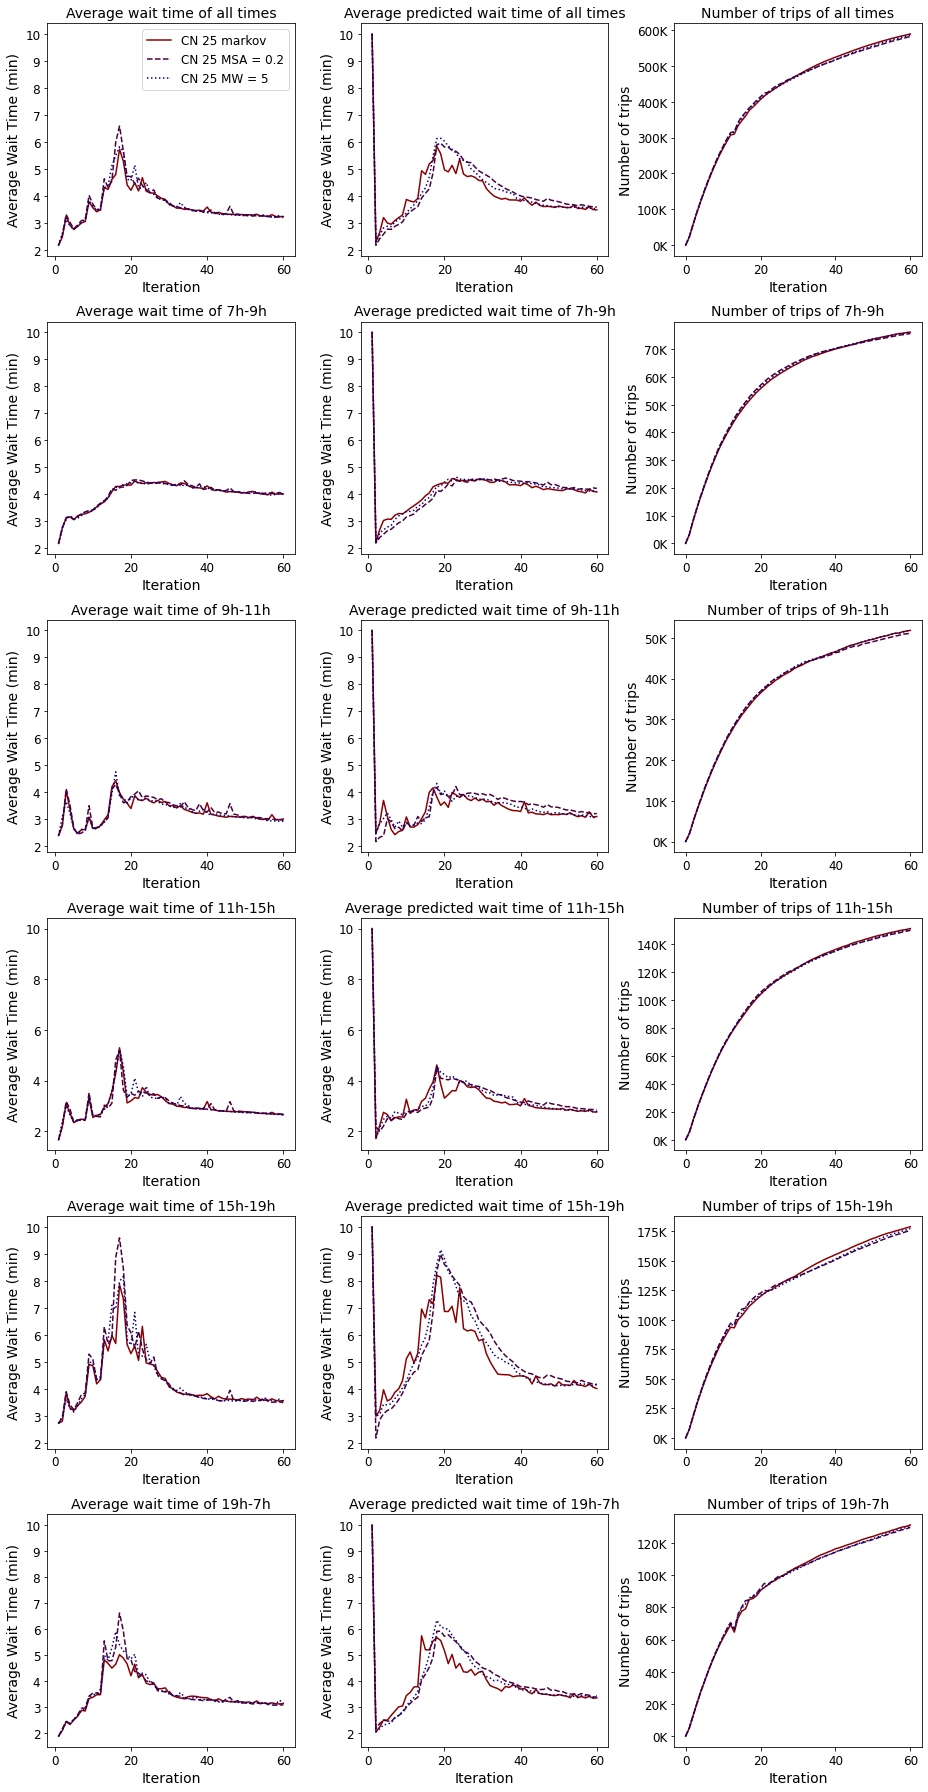

In [68]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color)